# U.S. Medical Insurance Costs

#### There are 7 columns in the csv file insurance.csv:  
1. age  
2. sex  
3. bmi  
4. children  
5. smoker  
6. region   
7. charges

Now we should perform some analysis on the subject. For easier analysis, we will use pandas.
What are we looking at?

AxesSubplot(0.125,0.125;0.775x0.755)


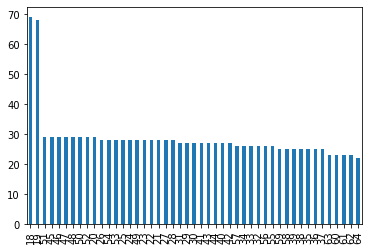

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('insurance.csv')
print(df.age.value_counts(sort = True).plot.bar(x="Age", y="Count"))


AxesSubplot(0.125,0.125;0.775x0.755)


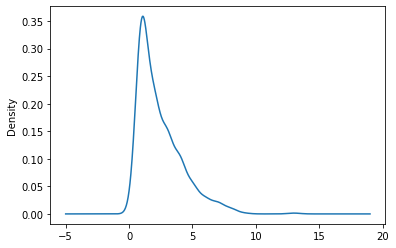

In [3]:
print(df.bmi.value_counts(sort = True).plot.kde(x="BMI", y="Count"))

AxesSubplot(0.125,0.125;0.775x0.755)


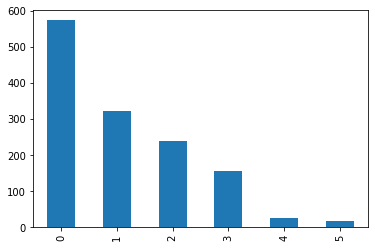

In [4]:
print(df.children.value_counts(sort = True).plot.bar(x="Children", y="Count"))


AxesSubplot(0.125,0.125;0.775x0.755)


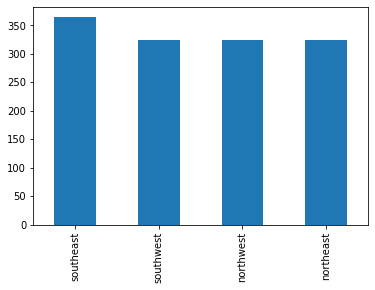

In [5]:
print(df.region.value_counts(sort = True).plot.bar(x="Region", y="Count"))


AxesSubplot(0.125,0.125;0.775x0.755)


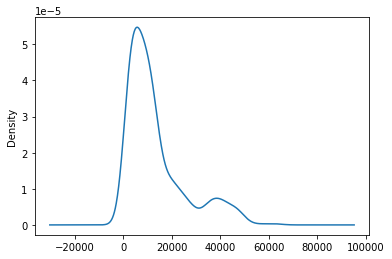

In [6]:
print(df.charges.plot.kde())

In [7]:
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [8]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


Now we know the data we are working with.

From exposing our data, we can conclude that there is a similar distribution of males and females, an overrepresentation of 18 and 19 years old people and that both BMI and how much people are charged are similarly skewed left.

In [9]:
print("Mean age: ",df.age.mean())
print( "Mean children: ", df.children.mean())
print("Mean bmi: ",df.bmi.mean())
print("Mean charge: ",df.charges.mean())

Mean age:  39.20702541106129
Mean children:  1.0949177877429
Mean bmi:  30.66339686098655
Mean charge:  13270.422265141257


We can notice that the mean bmi and mean charge are both pretty skewed left. That could mean people on the higher bmi end and the ones charged are weighting on our representation of the US' BMI and Insurance Cost. Let's check the median instead:

In [10]:
print("Median bmi: ",df.bmi.median())
print("Median charge: ",df.charges.median())

Median bmi:  30.4
Median charge:  9382.033


That's surprising! The BMI mean and median are pretty close but people who are charged more are really weighting on the mean. But let's go a bit further. Let's create a model which predicts how much people are charged, and let's see how every factor weights on the cost of the insurance. First. let's clean clean up the data and augment it so we can properly analyse it.

In [34]:
df['region_code'] = df.region.map({'southeast': 1, 'southwest': 0, 'northwest': 2, 'northeast': 3})
df['sex_code'] = df.sex.map({'male': 0, 'female': 1})
df['smoker_code'] = df.smoker.map({'yes': 1, 'no': 0})

df.dropna(inplace=True)
features = df[['age', 'sex_code', 'children','bmi', 'region_code', 'smoker_code']]
label = df['charges']

Having all features and the label we want, we should create a model which predicts how much someone would be charged based on actual values. To find out much each feature weights on each to find how much it should charge we get could do the following it's invoke .coef_:

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.1)

model = LinearRegression().fit(x_train, y_train)
predict = model.predict(x_test)
print(model.score(x_test, y_test))
print(model.coef_)

0.7921956682139237
[  253.23436696   224.23304463   423.14154218   329.7104546
   312.09826943 23887.43796373]
